<a href="https://colab.research.google.com/github/Taikatou/economy-monte-carlo/blob/main/open_ai_environment_monsters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
from gym import spaces
import numpy as np

In [2]:
pip install stable-baselines3[extra]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.1 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=78f8a868a7d660898340ea1d8d792126b0b3d0a3148b83ed9566721b06c6c1c9
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [3]:
import gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

In [5]:
from enum import IntEnum, Enum
class MonsterType(Enum):
    NORMAL = 1
    POISON = 2
    FLYING = 3
    ROCK = 4

class Monster:
    def __init__(self, base_victory_chance, experience_points, monster_type):
        base_victory_chance *= 0.7
        self.victory_chances = [min(base_victory_chance * (1.4 ** level), 1.0) for level in range(10)]
        for x in range(len(self.victory_chances)):
            if self.victory_chances[x] < 0.3:
              self.victory_chances[x] = 0
        print(self.victory_chances)
        self.experience_points = experience_points
        self.monster_type = monster_type

class Environment:
    def __init__(self, name, monsters, spawn_probabilities):
        self.name = name
        self.monsters = monsters
        self.spawn_probabilities = spawn_probabilities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Example initialization
# Using a dictionary for monsters
monsters = {
    "Gorilla": Monster(0.6, 20, MonsterType.ROCK),  # Base chance 60%, medium difficulty
    "Owl": Monster(0.7, 25, MonsterType.FLYING),      # Base chance 70%, easier
    "Snake": Monster(0.5, 50, MonsterType.POISON),    # Base chance 50%, more difficult
    "Bear": Monster(0.6, 45, MonsterType.NORMAL),
    "Narwhal": Monster(0.18, 160, MonsterType.ROCK),
    "Bull": Monster(0.1, 250, MonsterType.NORMAL),
    "Dragon": Monster(0.05, 350, MonsterType.FLYING),
    "Lion": Monster(0.8, 15, MonsterType.ROCK),
    "Serpant": Monster(0.2, 120, MonsterType.POISON)
}

# Adjusting environment initialization accordingly
environments = [
    Environment("Forest", ["Gorilla", "Owl"], [0.7, 0.3]),
    Environment("Mountain", ["Snake", "Bear"], [0.6, 0.4]),
    Environment("Sea", ["Narwhal", "Serpant"], [0.5, 0.5]),
    Environment("Volcano", ["Dragon", "Bull"], [0.3, 0.7])
    # Add other environments as needed
]

[0.42, 0.588, 0.8231999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.48999999999999994, 0.6859999999999998, 0.9603999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.35, 0.48999999999999994, 0.6859999999999998, 0.9603999999999997, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.42, 0.588, 0.8231999999999998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0, 0, 0, 0.34574399999999994, 0.4840415999999999, 0.6776582399999997, 0.9487215359999998, 1.0, 1.0, 1.0]
[0, 0, 0, 0, 0, 0.37647679999999983, 0.5270675199999998, 0.7378945279999995, 1.0, 1.0]
[0, 0, 0, 0, 0, 0, 0, 0.3689472639999998, 0.5165261695999996, 0.7231366374399996]
[0.5599999999999999, 0.7839999999999999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0, 0, 0, 0.3841599999999999, 0.5378239999999999, 0.7529535999999997, 1.0, 1.0, 1.0, 1.0]


In [7]:
class AgentType(IntEnum):
    BRAWLER = 1
    SWORDSMAN = 2
    MAGE = 3

modifiers = {
    AgentType.BRAWLER: {
        MonsterType.ROCK: 1.2,
        MonsterType.FLYING: 0.7
    },
    AgentType.SWORDSMAN: {
        MonsterType.POISON: 1.2,
        MonsterType.ROCK: 0.7
    },
    AgentType.MAGE: {
        MonsterType.FLYING: 1.2,
        MonsterType.POISON: 0.7
    }
}

In [8]:
import random

class DeepQBanditEnv(gym.Env):
    metadata = {'render.modes': ['console']}

    def __init__(self, environments, level_up_exp):
        super(DeepQBanditEnv, self).__init__()
        self.environments = environments
        self.level_up_exp = level_up_exp
        self.num_environments = len(environments)
        self.current_level = 0
        self.current_exp = 0
        self.action_space = spaces.Discrete(self.num_environments)
        self.observation_space = spaces.Box(low=np.array([0, 0, 1]), high=np.array([10, max(level_up_exp), len(AgentType)]), dtype=np.int32)
        self.agent_type = random.choice(list(AgentType))

    def reset(self):
        self.current_level = 0
        self.current_exp = 0
        self.agent_type = random.choice(list(AgentType))
        return np.array([self.current_level, self.current_exp, self.agent_type])

    def step(self, action):
        reward = -0.05
        old_level = self.current_level
        environment = self.environments[action]
        monster_key = np.random.choice(environment.monsters, p=environment.spawn_probabilities)
        monster = monsters[monster_key]
        victory_chance = self.calculate_victory_chance(monster, self.current_level)
        if random.random() < victory_chance:
            self.current_exp += monster.experience_points
            while self.current_level < 10 and self.current_exp >= self.level_up_exp[self.current_level]:
                self.current_level += 1
                self.current_exp -= self.level_up_exp[self.current_level - 1]
        else:
            reward -= 0.05
        done = self.current_level == 10
        if old_level != self.current_level:
            reward += 1
        return np.array([self.current_level, self.current_exp, self.agent_type]), reward, done, {}

    def render(self, mode='console'):
        if mode == 'console':
            print(f"Current Level: {self.current_level}, Current EXP: {self.current_exp}")

    def calculate_victory_chance(self, monster, level):
        base_chance = monster.victory_chances[level]
        # Get modifier from dictionary, defaulting to 1 if not found
        modifier = modifiers.get(self.agent_type, {}).get(monster.monster_type, 1)
        adjusted_chance = base_chance * modifier
        # Ensure the chance is within bounds (0.05 to 0.95)
        return max(min(adjusted_chance, 0.95), 0.05)

level_up_exp = [30, 60, 90, 140, 380, 760, 1220, 2840, 4861, 9360]
env = DeepQBanditEnv(environments, level_up_exp)
print(env.observation_space)

Box([0 0 1], [  10 9360    3], (3,), int32)


In [9]:
import matplotlib.pyplot as plt
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class RewardLoggerCallback(BaseCallback):
    def __init__(self, check_freq):
        super(RewardLoggerCallback, self).__init__()
        self.check_freq = check_freq
        self.rewards = []

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            episode_rewards = self.model.ep_info_buffer
            if episode_rewards:
                self.rewards.append(episode_rewards[-1]['r'])
        return True

reward_logger = RewardLoggerCallback(check_freq=1000)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Box([0 0 1], [  10 9360    3], (3,), int32)
Using cpu device


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 196      |
|    ep_rew_mean     | -3.85    |
| time/              |          |
|    fps             | 5140     |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 16384    |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 230         |
|    ep_rew_mean          | -3.95       |
| time/                   |             |
|    fps                  | 1411        |
|    iterations           | 2           |
|    time_elapsed         | 23          |
|    total_timesteps      | 32768       |
| train/                  |             |
|    approx_kl            | 0.014969192 |
|    clip_fraction        | 0.0568      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.00363     |
|    learning_rate        | 0.

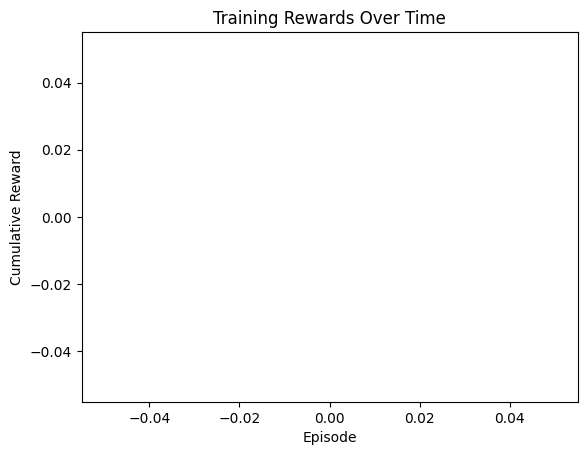

In [11]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.noise import NormalActionNoise

vec_env = make_vec_env(lambda: env, n_envs=8)
print(vec_env.observation_space)
# Initialize SAC model
model = PPO("MlpPolicy", vec_env, verbose=1)

# Train the model
model.learn(total_timesteps=300000)

# Save the model
model.save("sac_deepq_bandit")
# Plot the rewards
plt.plot(reward_logger.rewards)
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Training Rewards Over Time')
plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

def simulate_level_ups(agent_type, use_random_policy, num_levels, num_environments, num_iterations):
    action_counts = np.zeros((num_levels, num_environments))
    rec_env = DeepQBanditEnv(environments, level_up_exp)

    for iteration in range(num_iterations):
        # Create a new instance of the environment for the thread
        obs = rec_env.reset()
        rec_env.agent_type = agent_type
        done = False
        time_steps = 0
        new_level = obs[0]
        while not done:
            if use_random_policy:
                action = env.action_space.sample()  # Random action
            else:
                action, _states = model.predict(obs, deterministic=True)  # Predicted action

            obs, rewards, done, info = rec_env.step(action)

            # Record the chosen action for the current level
            if 1 <= new_level <= num_levels:
                action_counts[new_level - 1, action] += 1

            new_level = obs[0]  # Assuming the first element of obs is the level


    return action_counts

# Initialize statistics
num_levels = 10
average_times_by_type = {}
action_counts_by_type = {}

num_iterations = 30
num_levels = 9
num_environments = 4

with ThreadPoolExecutor(max_workers=None) as executor:
    futures = {}
    for agent_type in AgentType:
        # Run with trained policy
        futures[(agent_type, False)] = executor.submit(
            simulate_level_ups, agent_type, False, num_levels, num_environments, num_iterations
        )
        # Run with random policy
        futures[(agent_type, True)] = executor.submit(
            simulate_level_ups, agent_type, True, num_levels, num_environments, num_iterations
        )

    for key, future in futures.items():
        action_counts_by_type[key] = future.result()

# Now, average_times_by_type contains the average time steps to level up
# and action_counts_by_type contains the action distribution


In [13]:
from google.colab import files

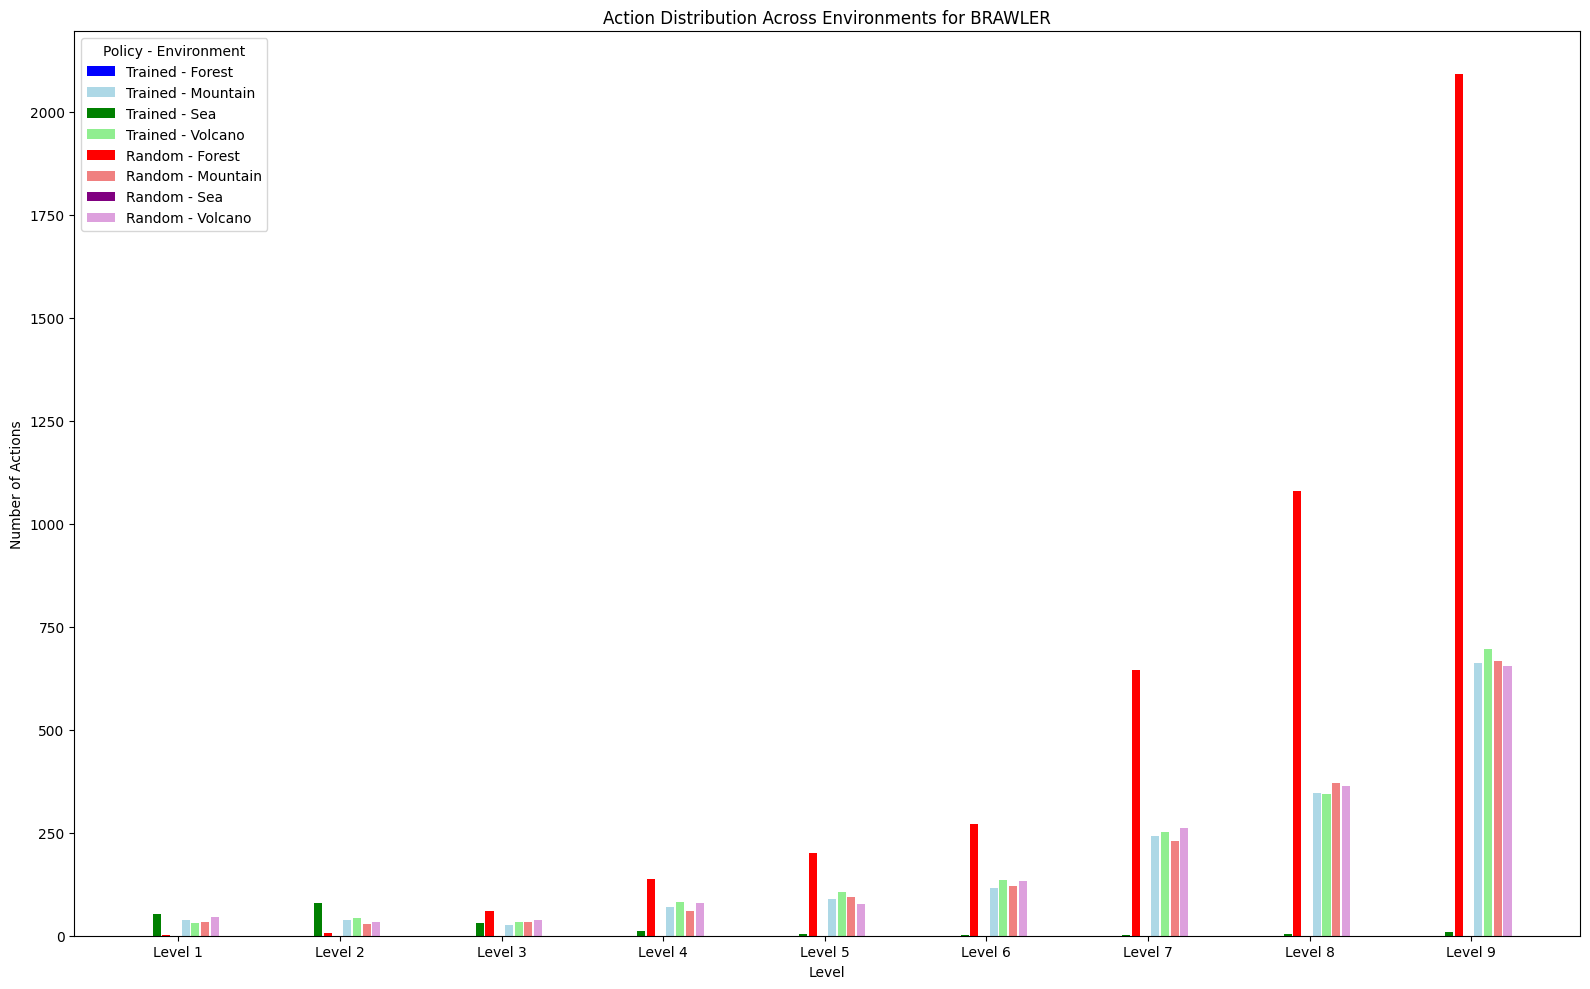

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

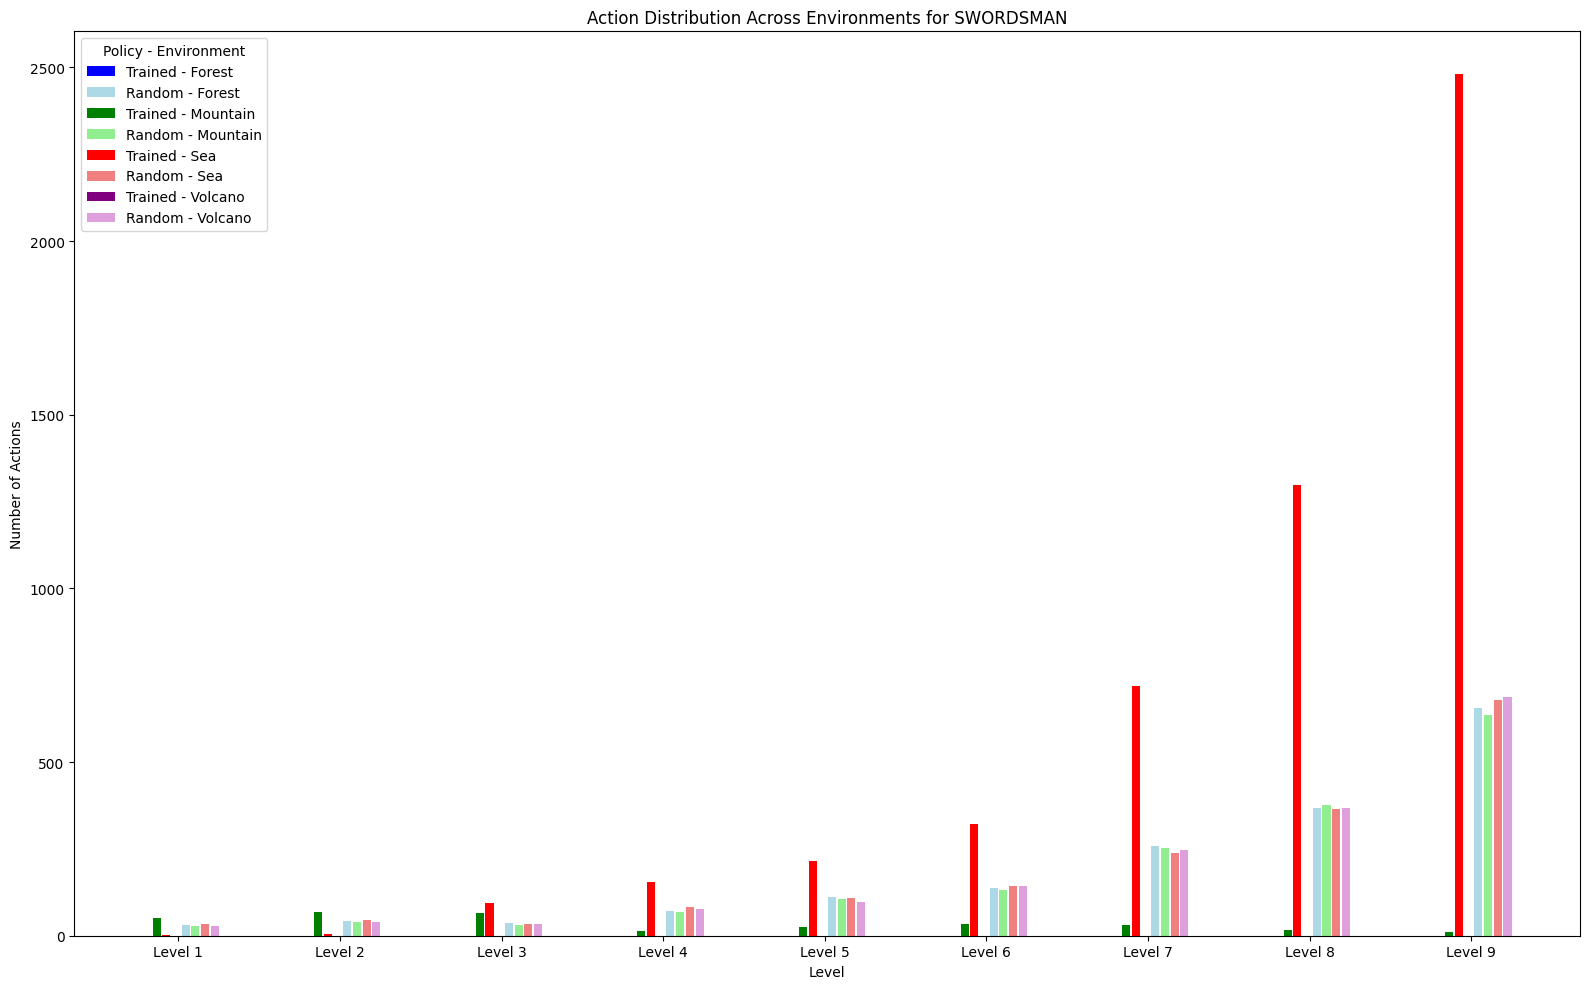

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

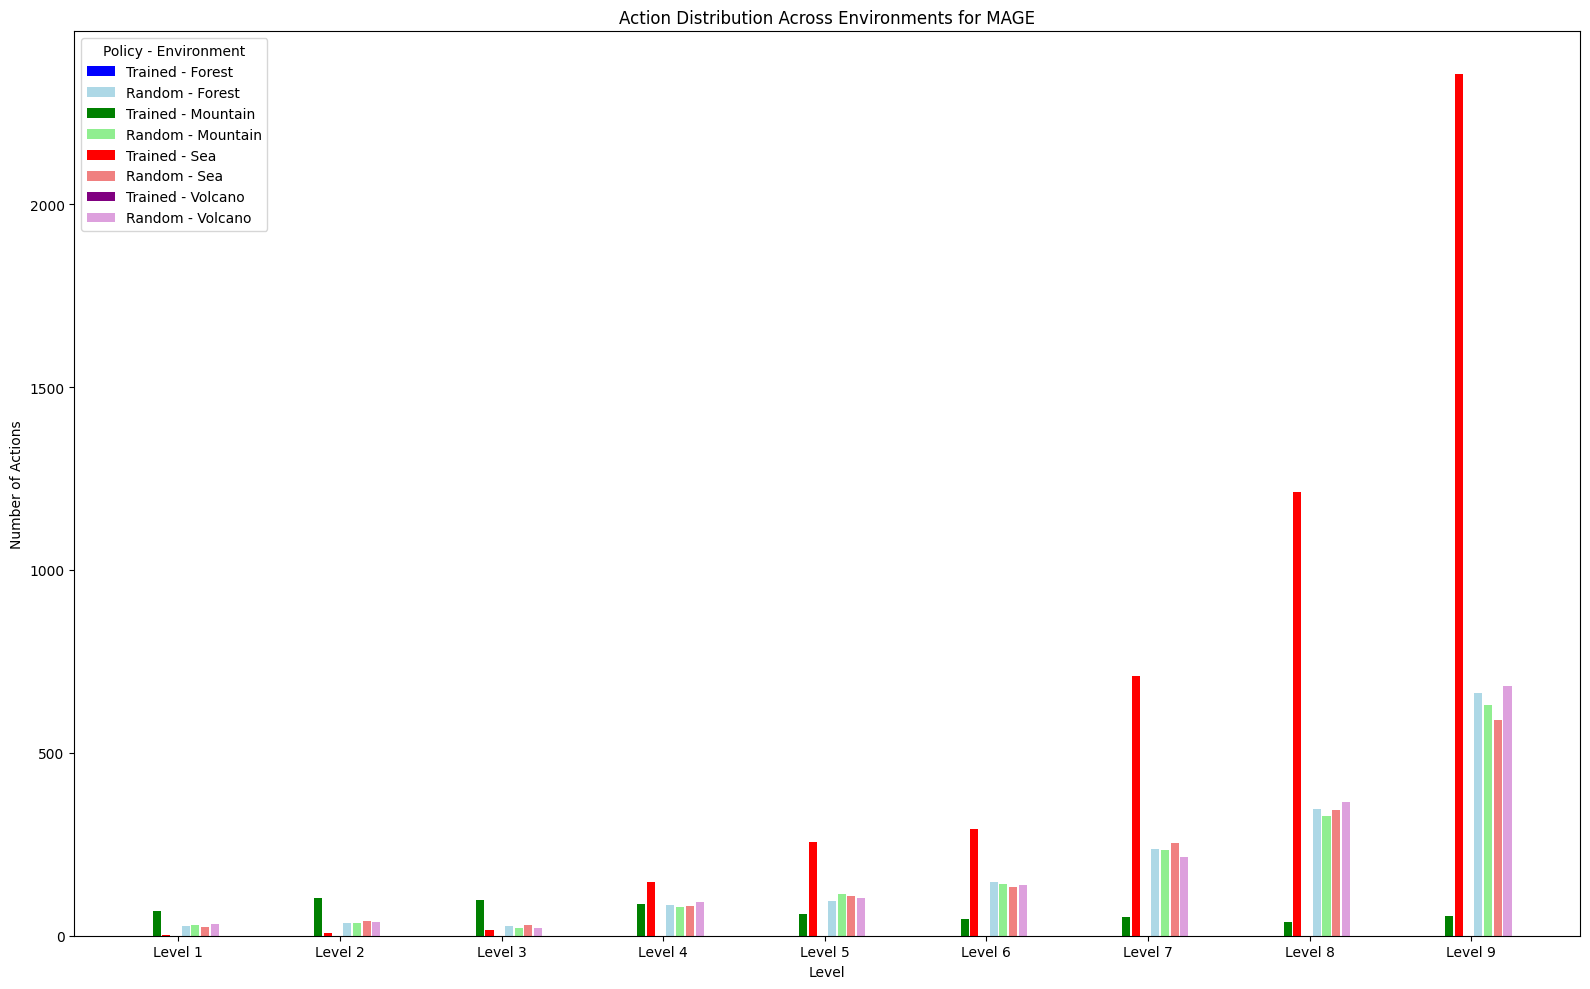

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:

# Assuming 'action_counts_by_type' is a dictionary with keys as (AgentType, bool) and values as a NumPy array of shape (num_levels, num_environments)
# Initialize the number of levels, environments, and the text labels for the environments
num_levels = 9  # Total number of levels
num_environments = 4  # Total number of environments
environments_text = ['Forest', 'Mountain', 'Sea', 'Volcano']  # Environment names

# Define the bar width, the spacing between bars, and the overall group width
bar_width = 0.05
spacer_width = 0.01
group_width = num_environments * (bar_width * 2 + spacer_width)

# Calculate the x-axis positions for the groups of bars
index = np.arange(1, num_levels + 1)


# Define colors for trained and random bars
# Colors for the 'Trained' bars
trained_colors = ['blue', 'green', 'red', 'purple']

# Lighter colors for the 'Random' bars
random_colors = ['lightblue', 'lightgreen', 'lightcoral', 'plum']

# Plotting the Bar Charts with Clustered Groups for Each Policy
for agent_type in AgentType:
    legend_handles = []
    fig, ax = plt.subplots(figsize=(20, 10))

    # Offset initialization
    offset = -group_width/2.0 + bar_width/2.0

    for i, env_name in enumerate(environments_text):
        trained_positions = index + offset + i * (bar_width + spacer_width)
        random_positions = index + offset + i * (bar_width + spacer_width) + (bar_width*4) + (spacer_width*4)

        trained_counts = action_counts_by_type[(agent_type, False)][:, i]
        random_counts = action_counts_by_type[(agent_type, True)][:, i]

        trained_bar = ax.bar(trained_positions, trained_counts, bar_width, label=f'Trained - {env_name}', color=trained_colors[i])
        random_bar = ax.bar(random_positions, random_counts, bar_width, label=f'Random - {env_name}', color=random_colors[i])
        if agent_type == list(AgentType)[0]:
            legend_handles.append(trained_bar[0])
            legend_handles.append(random_bar[0])

    # Adding the legend outside of the plot area to the right
    legend_labels = [f'Trained - {env}' for env in environments_text] + \
                    [f'Random - {env}' for env in environments_text]
    ax.legend(handles=legend_handles, labels=legend_labels, title='Policy - Environment', loc='upper left')

    # Setting the x-axis labels and title
    ax.set_xticks(index)
    ax.set_xticklabels([f'Level {lvl}' for lvl in range(1, num_levels + 1)])
    ax.set_xlabel('Level')
    ax.set_ylabel('Number of Actions')
    ax.set_title(f'Action Distribution Across Environments for {agent_type.name}')

    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Adjust layout to make room for legend
    filename = f'Action_Distribution_{agent_type.name}.png'
    plt.savefig(filename)

    # Show the plot
    plt.show()

    # Use the Google Colab files module to download the saved figure
    files.download(filename)

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

# Hyperparameters
GAMMA = 0.99
LEARNING_RATE = 0.001
MEMORY_SIZE = 100000
BATCH_SIZE = 64
EPSILON_START = 1.0
EPSILON_END = 0.01
EPSILON_DECAY = 0.997
TARGET_UPDATE = 10

In [83]:
# Q-Network
import random

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, hidden_size=64):
        super(QNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, action_size)

    def forward(self, state):
        x = self.fc1(state)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.epsilon = EPSILON_START

        # Q-Network
        self.q_network = QNetwork(state_size, action_size)
        for param in self.q_network.parameters():
            param.requires_grad = True

        self.target_network = QNetwork(state_size, action_size)
        for param in self.target_network.parameters():
            param.requires_grad = True

        self.optimizer = optim.Adam(self.q_network.parameters(), lr=LEARNING_RATE)

        # Replay memory
        self.memory = deque(maxlen=MEMORY_SIZE)

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if random.random() > self.epsilon:
            state = torch.from_numpy(np.array(state)).float().unsqueeze(0)
            with torch.no_grad():
                action_values = self.q_network(state)
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def replay(self):
        if len(self.memory) < BATCH_SIZE:
            return

        # Sample a batch of experiences
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*batch)
        states = torch.from_numpy(np.vstack(states)).float()
        actions = torch.from_numpy(np.vstack(actions)).long()
        rewards = torch.from_numpy(np.vstack(rewards)).float()
        next_states = torch.from_numpy(np.vstack(next_states)).float()
        dones = torch.from_numpy(np.vstack(dones).astype(np.uint8)).float()

        # Compute Q targets for current states
        Q_targets_next = self.target_network(next_states).detach().max(1)[0].unsqueeze(1)
        Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))

        # Get expected Q values from local model
        Q_expected = self.q_network(states).gather(1, actions)
        # Compute loss
        loss = nn.MSELoss()(Q_expected, Q_targets)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())


#####################################################################################

state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

total_discounted_rewards = []
# Training loop
num_episodes = 1000  # Adjust this for longer training
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        agent.replay()

    # Reduce epsilon
    if agent.epsilon > EPSILON_END:
        agent.epsilon *= EPSILON_DECAY

    # Update the target network
    if episode % TARGET_UPDATE == 0:
        agent.update_target_network()

    print(f"Episode: {episode}, Total reward: {total_reward}, Epsilon: {agent.epsilon}")
    total_discounted_rewards.append(total_reward)

# Close the environment
env.close()

Episode: 0, Total reward: -2.699999999999976, Epsilon: 0.997
Episode: 1, Total reward: -2.9999999999999796, Epsilon: 0.994009
Episode: 2, Total reward: -3.999999999999975, Epsilon: 0.991026973
Episode: 3, Total reward: -3.249999999999978, Epsilon: 0.988053892081
Episode: 4, Total reward: -4.699999999999975, Epsilon: 0.985089730404757
Episode: 5, Total reward: -2.699999999999976, Epsilon: 0.9821344612135428
Episode: 6, Total reward: -4.399999999999975, Epsilon: 0.9791880578299021
Episode: 7, Total reward: -4.199999999999979, Epsilon: 0.9762504936564125
Episode: 8, Total reward: -4.699999999999975, Epsilon: 0.9733217421754432
Episode: 9, Total reward: -2.699999999999977, Epsilon: 0.9704017769489168
Episode: 10, Total reward: -5.199999999999973, Epsilon: 0.9674905716180701
Episode: 11, Total reward: -2.999999999999978, Epsilon: 0.9645880999032158
Episode: 12, Total reward: -4.049999999999974, Epsilon: 0.9616943356035061
Episode: 13, Total reward: -4.249999999999977, Epsilon: 0.95880925259

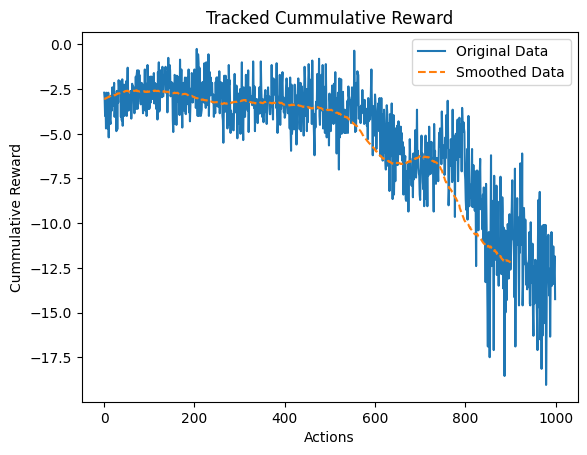

In [84]:
def moving_average(data, window_size):
    """Smooth data by calculating the moving average over a window."""
    if window_size <= 1:
        return data  # No smoothing needed for window size 1 or less

    cumulative_sum = np.cumsum(np.insert(data, 0, 0))
    smoothed_data = (cumulative_sum[window_size:] - cumulative_sum[:-window_size]) / window_size
    return smoothed_data

smoothed_data = moving_average(total_discounted_rewards, window_size=100)  # Example window size

# Plotting
plt.plot(total_discounted_rewards, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data', linestyle='--')
plt.title("Tracked Cummulative Reward")
plt.xlabel("Actions")
plt.ylabel("Cummulative Reward")
plt.legend()
plt.show()

In [ ]:
import math# Discretize the state space

NUM_BINS = [4, 4, 4, 4]  # Number of bins for discretizing each state dimension


def discretize_state(state, bins):
    discretized = list()
    for i in range(len(state)):
        scaling = (state[i] + abs(bins[i][0])) / (bins[i][1] - bins[i][0])
        new_state = int(round((NUM_BINS[i] - 1) * scaling))
        new_state = min(NUM_BINS[i] - 1, max(0, new_state))
        discretized.append(new_state)
    return tuple(discretized)

# Initialize environment
n_actions = env.action_space.n

# Create bins for discretization
state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
state_bounds[1] = [-0.5, 0.5]  # Limiting range for velocity
state_bounds[3] = [-math.radians(50), math.radians(50)]  # Limiting range for pole angle velocity
bins = [np.linspace(b[0], b[1], NUM_BINS[i] + 1) for i, b in enumerate(state_bounds)]

# Initialize Q-table
q_table = np.zeros(NUM_BINS + [n_actions])

In [ ]:
epsilon = EPSILON_START
total_discounted_rewards = []
import random

for episode in range(10000):  # Number of episodes
    discretized_state = discretize_state(env.reset(), bins)
    done = False
    total_discounted_reward = 0
    t = 0  # Time step
    while not done:
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[discretized_state])  # Exploit

        # Take action and observe new state and reward
        next_state, reward, done, _ = env.step(action)
        discretized_next_state = discretize_state(next_state, bins)

        # Update Q-table
        best_next_action = np.argmax(q_table[discretized_next_state])
        td_target = reward + GAMMA * q_table[discretized_next_state][best_next_action]
        q_table[discretized_state + (action,)] += LEARNING_RATE * (td_target - q_table[discretized_state + (action,)])

        discretized_state = discretized_next_state

        total_discounted_reward += (GAMMA ** t) * reward
        t += 1

    total_discounted_rewards.append(total_discounted_reward)

    # Update epsilon
    epsilon = max(EPSILON_END, epsilon * EPSILON_DECAY)

# Close the environment
env.close()

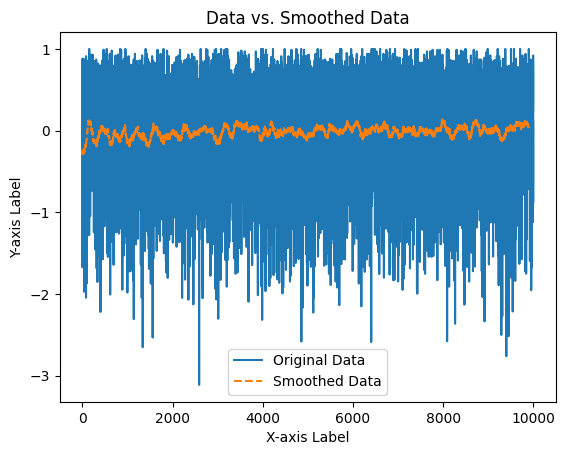

In [ ]:
def moving_average(data, window_size):
    """Smooth data by calculating the moving average over a window."""
    if window_size <= 1:
        return data  # No smoothing needed for window size 1 or less

    cumulative_sum = np.cumsum(np.insert(data, 0, 0))
    smoothed_data = (cumulative_sum[window_size:] - cumulative_sum[:-window_size]) / window_size
    return smoothed_data

smoothed_data = moving_average(total_discounted_rewards, window_size=100)  # Example window size

# Plotting
plt.plot(total_discounted_rewards, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data', linestyle='--')
plt.title("Data vs. Smoothed Data")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.legend()
plt.show()

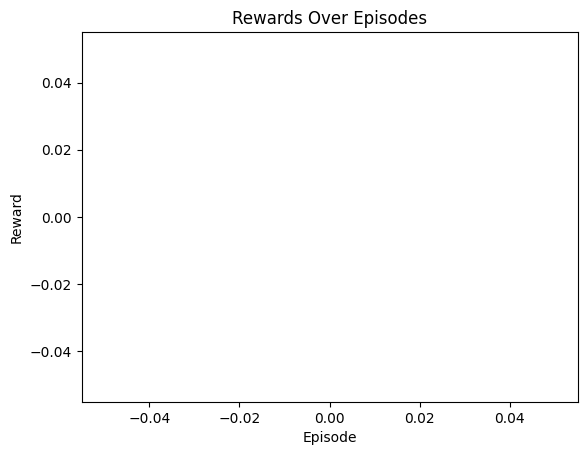

In [ ]:
plt.plot(reward_logger.rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Episodes')
plt.show()

In [ ]:
sword_requirements = {
    "Beginner Sword": { Resource.WOOD: 1, Resource.METAL: 1},
    "Intermediate Sword": { Resource.WOOD: 2, Resource.METAL: 2},
    "Advanced Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 1},
    "Epic Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 2},
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 2, Resource.DRAGONSCALE: 1}
}

In [ ]:
from statistics import mean

In [ ]:
random_policy = False
def run_simulation_for_selected_swords(selected_swords, prices, budget, max_iterations=20000, num_runs=3):
    grid_search_results = {}
    for sword, requirements in selected_swords.items():
        avg_steps = []
        for x in range(200):
            # Convert requirements to context format for the bandit
            context = [0, 0, 0, 0]
            for resource, value in requirements.items():
                index = int(resource) - 1
                context[index] = value

            steps = 0
            env.init(context)
            state = env.context
            done = False
            while not done:
                if random_policy:
                    action = env.action_space.sample()
                else:
                    action = agent.act(state)
                next_state, reward, done, _ = env.step(action)
                agent.remember(state, action, reward, next_state, done)
                state = next_state
                steps += 1
            # Record results for this set of requirements
            avg_steps.append(steps)
        grid_search_results[sword] = mean(avg_steps)
    return grid_search_results

FORCE_RANDOM = False
CHOOSE_OPTIMAL = True
adjusted_prices = {"wood": 1, "metal": 2, "gem": 5, "dragonscale": 10}
adjusted_budget = 1000  # Increased budget
max_iterations = 1000
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Beginner Sword': 4.82, 'Intermediate Sword': 9.12, 'Advanced Sword': 13.38, 'Epic Sword': 15.98, 'Ultimate Sword': 18.895}
{'Beginner Sword': 10.77, 'Intermediate Sword': 22.1, 'Advanced Sword': 22.96, 'Epic Sword': 29.3, 'Ultimate Sword': 34.9}


In [ ]:
sword_requirements = {
    "Beginner Sword": { Resource.WOOD: 2, Resource.METAL: 1},
    "Intermediate Sword": { Resource.WOOD: 3, Resource.METAL: 2},
    "Advanced Sword": { Resource.WOOD: 3, Resource.METAL: 2, Resource.GEM: 1},
    "Epic Sword": { Resource.WOOD: 3, Resource.METAL: 2, Resource.GEM: 2},
    "Ultimate Sword": { Resource.WOOD: 3, Resource.METAL: 2, Resource.GEM: 2, Resource.DRAGONSCALE: 1}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Beginner Sword': 7.185, 'Intermediate Sword': 11.875, 'Advanced Sword': 16.95, 'Epic Sword': 21.025, 'Ultimate Sword': 22.065}
{'Beginner Sword': 20.01, 'Intermediate Sword': 31.245, 'Advanced Sword': 32.645, 'Epic Sword': 32.815, 'Ultimate Sword': 39.325}


In [ ]:
sword_requirements = {
    "Beginner Sword": { Resource.WOOD: 1, Resource.METAL: 2},
    "Intermediate Sword": { Resource.WOOD: 2, Resource.METAL: 3},
    "Advanced Sword": { Resource.WOOD: 2, Resource.METAL: 3, Resource.GEM: 1},
    "Epic Sword": { Resource.WOOD: 2, Resource.METAL: 3, Resource.GEM: 2},
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 3, Resource.GEM: 2, Resource.DRAGONSCALE: 1}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Beginner Sword': 7.335, 'Intermediate Sword': 11.77, 'Advanced Sword': 15.14, 'Epic Sword': 18.775, 'Ultimate Sword': 21.44}
{'Beginner Sword': 13.46, 'Intermediate Sword': 24.94, 'Advanced Sword': 24.25, 'Epic Sword': 29.405, 'Ultimate Sword': 34.83}


In [ ]:
sword_requirements = {
    "Beginner Sword": { Resource.WOOD: 0, Resource.METAL: 1},
    "Intermediate Sword": { Resource.WOOD: 1, Resource.METAL: 2},
    "Advanced Sword": { Resource.WOOD: 1, Resource.METAL: 2, Resource.GEM: 1},
    "Epic Sword": { Resource.WOOD: 1, Resource.METAL: 2, Resource.GEM: 2},
    "Ultimate Sword": { Resource.WOOD: 1, Resource.METAL: 2, Resource.GEM: 2, Resource.DRAGONSCALE: 1}
}

In [ ]:

random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Beginner Sword': 2.44, 'Intermediate Sword': 7.07, 'Advanced Sword': 10.025, 'Epic Sword': 13.995, 'Ultimate Sword': 16.645}
{'Beginner Sword': 4.86, 'Intermediate Sword': 14.185, 'Advanced Sword': 17.76, 'Epic Sword': 24.035, 'Ultimate Sword': 31.415}


In [ ]:
sword_requirements = {
    "Beginner Sword": { Resource.WOOD: 1, Resource.METAL: 0},
    "Intermediate Sword": { Resource.WOOD: 2, Resource.METAL: 1},
    "Advanced Sword": { Resource.WOOD: 2, Resource.METAL: 1, Resource.GEM: 1},
    "Epic Sword": { Resource.WOOD: 2, Resource.METAL: 1, Resource.GEM: 2},
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 1, Resource.GEM: 2, Resource.DRAGONSCALE: 1}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Beginner Sword': 3.655, 'Intermediate Sword': 7.235, 'Advanced Sword': 11.97, 'Epic Sword': 15.38, 'Ultimate Sword': 18.045}
{'Beginner Sword': 9.09, 'Intermediate Sword': 19.43, 'Advanced Sword': 22.98, 'Epic Sword': 27.76, 'Ultimate Sword': 33.115}


In [ ]:
sword_requirements = {
    "Advanced Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 0},
    "Epic Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 1},
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 1, Resource.DRAGONSCALE: 1}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Advanced Sword': 9.18, 'Epic Sword': 13.335, 'Ultimate Sword': 15.685}
{'Advanced Sword': 22.9, 'Epic Sword': 23.385, 'Ultimate Sword': 30.515}


In [ ]:
sword_requirements = {
    "Advanced Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 2},
    "Epic Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 3},
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 3, Resource.DRAGONSCALE: 1}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Advanced Sword': 16.84, 'Epic Sword': 20.62, 'Ultimate Sword': 22.945}
{'Advanced Sword': 27.31, 'Epic Sword': 35.5, 'Ultimate Sword': 38.665}


In [ ]:
sword_requirements = {
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 2, Resource.DRAGONSCALE: 0}
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Ultimate Sword': 16.84}
{'Ultimate Sword': 27.105}


In [ ]:
sword_requirements = {
    "Ultimate Sword": { Resource.WOOD: 2, Resource.METAL: 2, Resource.GEM: 2, Resource.DRAGONSCALE: 2
                       }
}

In [ ]:
random_policy = False
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)
random_policy = True
results = run_simulation_for_selected_swords(sword_requirements, adjusted_prices, adjusted_budget, max_iterations)
print(results)

{'Ultimate Sword': 23.51}
{'Ultimate Sword': 46.35}
